平面上の点の位置の判定の安定性について調べてみた。

幾何的な計算を代数で行う（つまりコンピュータで扱えるような計算で行う）際に、ある点$p$が別の2点$q,r$のなす直線のどちら側にあるか？というのは基本的な問題である。基本的な問題であるが、有限精度での計算しか行えないコンピュータ（というか人類）には、なかなか難しい問題である。

Kettner L., Mehlhorn K., Pion S., Schirra S., Yap C. (2004) Classroom Examples of Robustness Problems in Geometric Computations. In: Albers S., Radzik T. (eds) Algorithms – ESA 2004. ESA 2004. Lecture Notes in Computer Science, vol 3221. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-540-30140-0_62

上の論文に出てくる具体例を使って、実際に自分でも難しさを味わってみたのでメモする。

## 問題

平面上の3点$p,q,r$が与えられたときに、点$p$が直線$q,r$のどちら側にあるか（あるいは直線上に乗っているか）を判定するプログラムを書きたい。じっくり考えると、

$$
\begin{matrix}
1 & p_x & p_y \\
1 & q_x & q_y \\
1 & r_x & r_y
\end{matrix}
$$

上のような行列を考えて、この行列式の符号で判定できることが分かる。具体的には、行列式が正（負）ならば、$p$は直線$qr$の左（右）側にある。ただし、**$p$が$qr$の左側にある**とは、$q$の上に立って$r$の方を観たときに、$p$が左側にあることとする。

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib.pyplot as plt

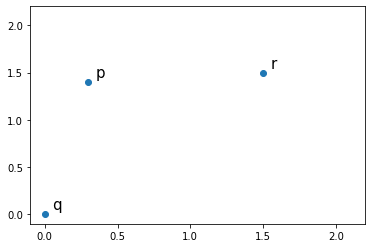

In [73]:
# __NOT_RENDER_SOURCE__

_x = np.array([
    [0.3, 1.4],
    [0, 0],
    [1.5, 1.5]
])
plt.scatter(_x[:,0], _x[:,1])
for i, v in enumerate(["p", "q", "r"]):
    plt.text(*_x[i] + [0.05,0.05], v, size=15)
_ = plt.xlim((-0.1, 2.2))
_ = plt.ylim((-0.1, 2.2))    

上の図のような配置のとき、$p$は$qr$の左側。このとき、上の行列式は正。

上の行列式によって、点の位置を判定する関数を実装する。

In [53]:
def orientation(p, q, r):
    return np.sign((q[0]-p[0])*(r[1]-p[1])-(q[1]-p[1])*(r[0]-p[0]))

計算機の誤差の限界を以下の通りに探す。

In [54]:
eps = 1.0
cnt = 0
while 1 + eps != 1:
    eps /= 2
    cnt += 1
print(eps, cnt)    

1.1102230246251565e-16 53


適当な平面上の3点$p,q,r$を固定し、$(p_x + m \epsilon, p_y + n \epsilon)$が$qr$の右側か左側かを$m,n\in\{0, \ldots, 255\}$の範囲で判定してみる。

In [57]:
p = np.array([0.5, 0.5])
q = np.array([12, 12])
r = np.array([24, 24])

In [58]:
ms, ns = range(256), range(256)

In [59]:
ret = np.array([orientation(p + np.array([m*eps, n*eps]), q, r) for m, n in itertools.product(ms, ns)])\
    .reshape((-1, 256))

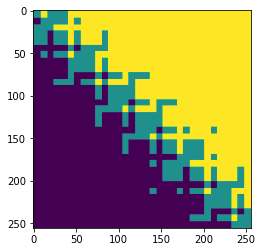

In [60]:
fig, ax = plt.subplots()
ax.imshow(ret)

図のように、境界値付近で、たくさんの判定ミスをしている。この図は、右方向がx軸の正の向き、下方向がy軸の正の向きとなっていることに注意。

ちなみに、`np.linalg.det`で行列式を計算すると、結果が安定したのでついでにメモ。

In [62]:
def orientation2(p, q, r):
    mat = np.ones((3,3))
    mat[:,:2] = [p,q,r]
    return np.sign(np.linalg.det(mat))

In [64]:
ret2 = np.array([orientation2(p + np.array([m*eps, n*eps]), q, r) for m, n in itertools.product(ms, ns)])\
    .reshape((-1, 256))

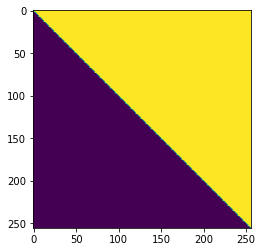

In [74]:
fig, ax = plt.subplots()
ax.imshow(ret2)

きれい過ぎて分からないので左上を拡大

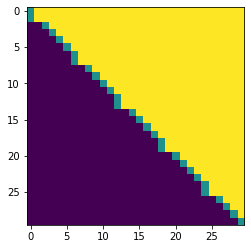

In [67]:
fig, ax = plt.subplots()
ax.imshow(ret2[:30, :30])

すごい